# Análisis de Datos Clínicos y Moleculares en Gliomas Difusos

Este proyecto se centra en la exploración de datos clínicos y moleculares de pacientes con gliomas difusos, con el objetivo de identificar patrones relevantes relacionados con características clínicas y moleculares sin entrar en análisis ómicos complejos.

## Descripción del Dataset

- Gliomas difusos: representan el 80% de los tumores cerebrales malignos en adultos.

- Clasificación histológica: oligodendroglioma, oligoastrocytoma, astrocytoma y glioblastoma.

- Grado tumoral: II a IV, según criterios histológicos de la WHO.

- Variabilidad: la clasificación histopatológica presenta alta variabilidad intra- e inter-observador, especialmente en tumores de grado II-III.

Origen de los datos: datasets generados por The Cancer Genome Atlas (TCGA).

## Variables Analizadas

Se analizaron principalmente datos clínicos y moleculares de los pacientes, incluyendo:

- Variable	N° de categorías/valores únicos
- years_to_birth	
- gender
- histological_type	
- race	
- ethnicity
- radiation_therapy
- Grade
- Mutation.Count	
- Percent.aneuploidy	3
- IDH.status
- outcome

## Conclusiones Parciales

1. Supervivencia del 100% en pacientes con oligodendroglioma.

2. Mortalidad del 100% en pacientes con astrocytoma y oligoastrocytoma.

3. Los pacientes que recibieron radioterapia mostraron mayor mortalidad relativa, asociada a que la mayoría correspondía a casos con grado histológico más avanzado (G3).

4. Estos hallazgos proporcionan un primer panorama de las relaciones entre características clínicas y moleculares de los pacientes.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\HP\Desktop\Análisis multiomicos\Análisis multi-ómico de gliomas difusos\Glioma.csv")
data.head()

,Case,years_to_birth,gender,histological_type,race,ethnicity,radiation_therapy,Grade,Mutation.Count,Percent.aneuploidy,...,TSC1,TSC2,WWTR1,XRCC1,XRCC5,YAP1,YBX1,YWHAB,YWHAE,YWHAZ
0,TCGA-CS-4938,31,female,astrocytoma,white,not hispanic or latino,no,G2,15,0.069412,...,1455.8422,1825.0472,1514.6130,759.8070,6062.5131,2080.1343,7140.3398,10055.3807,30969.1630,9261.5901
1,TCGA-CS-6665,51,female,astrocytoma,white,not hispanic or latino,yes,G3,75,0.524814,...,1194.3738,1685.1381,526.3176,693.4418,6973.3943,545.6702,11239.4509,8656.4989,19796.6446,12575.4957
2,TCGA-CS-6666,22,male,astrocytoma,white,not hispanic or latino,yes,G3,18,0.403165,...,1088.2018,2360.8727,905.4451,804.4670,6655.3614,730.4312,9499.7415,7289.4220,20114.1557,18329.4385
3,TCGA-DB-5270,38,female,oligoastrocytoma,white,not hispanic or latino,no,G3,16,0.061382,...,1397.5452,2081.1456,414.7801,793.3856,4214.4562,753.8357,4590.5217,11778.0430,22488.9192,12954.6539
4,TCGA-DB-5273,33,male,astrocytoma,white,not hispanic or latino,yes,G3,16,0.017349,...,1064.6498,1486.5313,4793.0874,1002.0721,5197.6792,1442.1881,9880.2321,7364.2768,30595.9387,9029.4240


In [3]:
data.shape

(306, 331)

In [4]:
columnas = data.columns
c_c_m= columnas[0:12]

In [5]:
datos_clinico_moleculares = data[c_c_m]
datos_clinico_moleculares.head()

,Case,years_to_birth,gender,histological_type,race,ethnicity,radiation_therapy,Grade,Mutation.Count,Percent.aneuploidy,IDH.status,outcome
0,TCGA-CS-4938,31,female,astrocytoma,white,not hispanic or latino,no,G2,15,0.069412,Mutant,1
1,TCGA-CS-6665,51,female,astrocytoma,white,not hispanic or latino,yes,G3,75,0.524814,Mutant,1
2,TCGA-CS-6666,22,male,astrocytoma,white,not hispanic or latino,yes,G3,18,0.403165,Mutant,1
3,TCGA-DB-5270,38,female,oligoastrocytoma,white,not hispanic or latino,no,G3,16,0.061382,Mutant,1
4,TCGA-DB-5273,33,male,astrocytoma,white,not hispanic or latino,yes,G3,16,0.017349,Mutant,1


In [6]:
datos_clinico_moleculares.nunique()

Case                  306
years_to_birth         57
gender                  2
histological_type       3
race                    3
ethnicity               2
radiation_therapy       2
Grade                   2
Mutation.Count         61
Percent.aneuploidy    306
IDH.status              2
outcome                 2
dtype: int64

In [7]:
datos_clinico_moleculares.groupby('histological_type')['histological_type'].count()

histological_type
astrocytoma           90
oligoastrocytoma      94
oligodendroglioma    122
Name: histological_type, dtype: int64

In [8]:
datos_clinico_moleculares.groupby('outcome')['outcome'].count()

outcome
0    122
1    184
Name: outcome, dtype: int64

In [9]:
def _violinplot(df, x, y, n1,n2,
    yticklabels: list[str] | None = None,
    plot_dps: bool = True,
) -> None:
    sns.violinplot(data=df, x=x, y=y, inner=None, ax=axs[n1,n2])
    if plot_dps:
        sns.stripplot(data=df, x=x, y=y, color="black", ax=axs[n1,n2])
    axs[n1,n2].set_title(f'Supervivencia vs {y}')



In [10]:
def caja(df,x,y, n1,n2):
    sns.boxplot(x=df[x], y=df[y], ax=axs[n1,n2])
    axs[n1,n2].set_title(f'Supervivencia vs {y}')


14 86


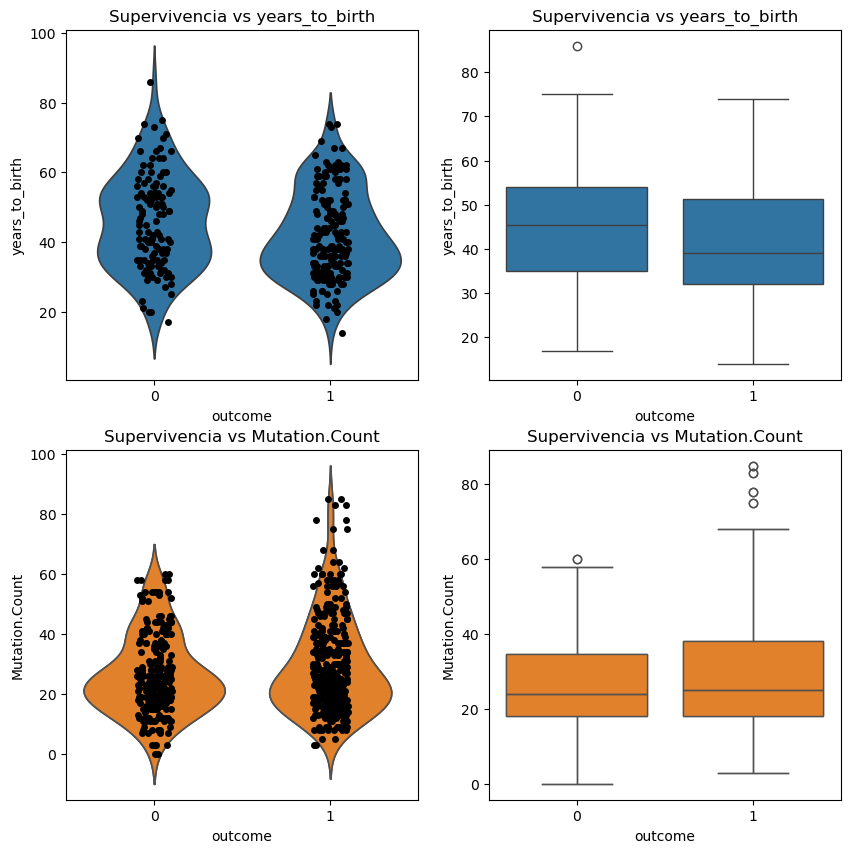

In [11]:
figure, axs = plt.subplots( 2,2, sharey=False, sharex=False, figsize=(10, 10))
print(datos_clinico_moleculares['years_to_birth'].min(), datos_clinico_moleculares['years_to_birth'].max())

_violinplot(datos_clinico_moleculares, 'outcome', 'years_to_birth', 0,0)
caja(datos_clinico_moleculares,'outcome', 'years_to_birth', 0, 1)

_violinplot(datos_clinico_moleculares, 'outcome', 'Mutation.Count', 1,0)
caja(datos_clinico_moleculares,'outcome', 'Mutation.Count', 1, 1)


_violinplot(datos_clinico_moleculares, 'outcome', 'Mutation.Count', 1,0)
caja(datos_clinico_moleculares,'outcome', 'Mutation.Count', 1, 1)

In [12]:
def graf_barras_x_dead_rel(df, x1, x2, y1, n1, n2):
    
    df_g = df.groupby([x2, x1])[y1].nunique().reset_index()
    df_g[x2] = df_g[x2].map({0: "Vivo", 1: "Muerto"})

    df_rel = df_g.copy()
    df_rel['rel'] = df_rel.groupby(x1)[y1].transform(lambda x: x / x.sum())

    # Graficamos (relativo)
    sns.barplot(data=df_rel, x=x1, y="rel", hue=x2, ax=axs[n1, n2])

    # Formato
    axs[n1, n2].set_ylabel("Proporción")
    axs[n1, n2].set_title(f'Distribución relativa de {x1}')
    axs[n1, n2].yaxis.set_major_formatter(lambda y, _: f"{y:.0%}")
    axs[n1,n2].legend(bbox_to_anchor=(1, 0.2), loc='upper left')
    axs[n1,n2].set_xticklabels(axs[n1,n2].get_xticklabels(), rotation=45, ha='right')
    axs[n1,n2].set_title(f'frecuencia relativa de supervivencia: {x1}')

C:\Users\HP\AppData\Local\Temp\ipykernel_23048\378769568.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[n1,n2].set_xticklabels(axs[n1,n2].get_xticklabels(), rotation=45, ha='right')
C:\Users\HP\AppData\Local\Temp\ipykernel_23048\378769568.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[n1,n2].set_xticklabels(axs[n1,n2].get_xticklabels(), rotation=45, ha='right')
C:\Users\HP\AppData\Local\Temp\ipykernel_23048\378769568.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[n1,n2].set_xticklabels(axs[n1,n2].get_xticklabels(), rotation=45, ha='right')
C:\Users\HP\AppData\Local\Temp\ipykernel_23048\378769568.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or us

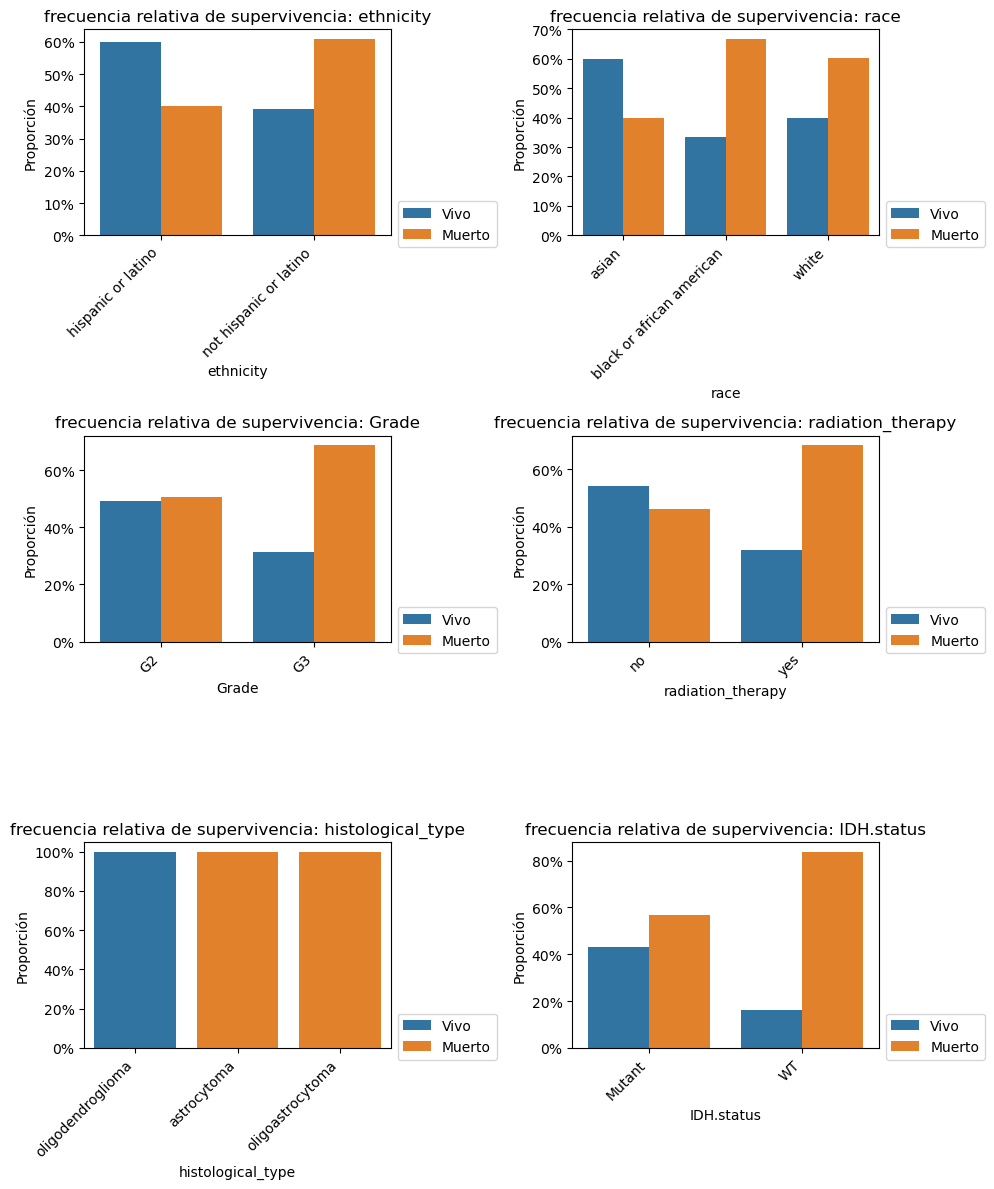

In [13]:
figure, axs = plt.subplots( 3,2, sharey=False, sharex=False, figsize=(10, 12))
graf_barras_x_dead_rel(datos_clinico_moleculares, 'ethnicity', 'outcome', 'Case',  0,0)
graf_barras_x_dead_rel(datos_clinico_moleculares, 'race', 'outcome', 'Case',  0,1)
graf_barras_x_dead_rel(datos_clinico_moleculares, 'Grade', 'outcome', 'Case',  1,0)
graf_barras_x_dead_rel(datos_clinico_moleculares, 'radiation_therapy', 'outcome', 'Case',  1,1)
graf_barras_x_dead_rel(datos_clinico_moleculares, 'histological_type', 'outcome', 'Case',  2,0)
graf_barras_x_dead_rel(datos_clinico_moleculares, 'IDH.status', 'outcome', 'Case',  2,1)
plt.tight_layout()
plt.show()

In [14]:
def graf_barras_x_rel(df, x1, x2, y1, n1, n2):
    
    df_g = df.groupby([x2, x1])[y1].nunique().reset_index()

    df_rel = df_g.copy()
    df_rel['rel'] = df_rel.groupby(x1)[y1].transform(lambda x: x / x.sum())

    # Graficamos (relativo)
    sns.barplot(data=df_rel, x=x1, y="rel", hue=x2, ax=axs[n1, n2])

    # Formato
    axs[n1, n2].set_ylabel("Proporción")
    axs[n1, n2].set_title(f'Distribución relativa de {x1}')
    axs[n1, n2].yaxis.set_major_formatter(lambda y, _: f"{y:.0%}")
    axs[n1,n2].legend(bbox_to_anchor=(1, 0.2), loc='upper left')
    axs[n1,n2].set_xticklabels(axs[n1,n2].get_xticklabels(), rotation=45, ha='right')
    axs[n1,n2].set_title(f'frecuencia relativa de supervivencia: {x1}')

In [15]:
datos_clinico_moleculares.columns

Index(['Case', 'years_to_birth', 'gender', 'histological_type', 'race',
       'ethnicity', 'radiation_therapy', 'Grade', 'Mutation.Count',
       'Percent.aneuploidy', 'IDH.status', 'outcome'],
      dtype='object')

In [16]:
def graf_barras(df, x, x2, x3, y, n1, n2, t):
    # Agrupamos y contamos pacientes
    df_g = df.groupby([x, x2 ])[y].nunique().reset_index()

    # Graficamos
    sns.barplot(data=df_g, x=x2, y=y, hue =x, ax=axs[n1, n2])
    axs[n1, n2].set_title(f'Distribución {t} de {x}')
    axs[n1,n2].legend(bbox_to_anchor=(1, 0.2), loc='upper left')
    axs[n1,n2].set_xticklabels(axs[n1,n2].get_xticklabels(), rotation=45, ha='right')

In [17]:
def graf_barras(df, x, x2, y, n1, n2, t):
    # Agrupamos y contamos pacientes
    df_g = df.groupby([x, x2])[y].nunique().reset_index()

    # Graficamos
    sns.barplot(data=df_g, x=x2, y=y, hue =x, ax=axs[n1, n2])
    axs[n1, n2].set_title(f'Distribución {t} de {x}')
    axs[n1,n2].legend(bbox_to_anchor=(1, 0.2), loc='upper left')
    axs[n1,n2].set_xticklabels(axs[n1,n2].get_xticklabels(), rotation=45, ha='right')
    

In [18]:
datos_clinico_moleculares['histological_type'].unique()

array(['astrocytoma', 'oligoastrocytoma', 'oligodendroglioma'],
      dtype=object)

C:\Users\HP\AppData\Local\Temp\ipykernel_23048\2555614344.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[n1,n2].set_xticklabels(axs[n1,n2].get_xticklabels(), rotation=45, ha='right')
C:\Users\HP\AppData\Local\Temp\ipykernel_23048\3685546853.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[n1,n2].set_xticklabels(axs[n1,n2].get_xticklabels(), rotation=45, ha='right')
C:\Users\HP\AppData\Local\Temp\ipykernel_23048\2555614344.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[n1,n2].set_xticklabels(axs[n1,n2].get_xticklabels(), rotation=45, ha='right')
C:\Users\HP\AppData\Local\Temp\ipykernel_23048\3685546853.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or 

C:\Users\HP\AppData\Local\Temp\ipykernel_23048\2555614344.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[n1,n2].set_xticklabels(axs[n1,n2].get_xticklabels(), rotation=45, ha='right')
C:\Users\HP\AppData\Local\Temp\ipykernel_23048\3685546853.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[n1,n2].set_xticklabels(axs[n1,n2].get_xticklabels(), rotation=45, ha='right')


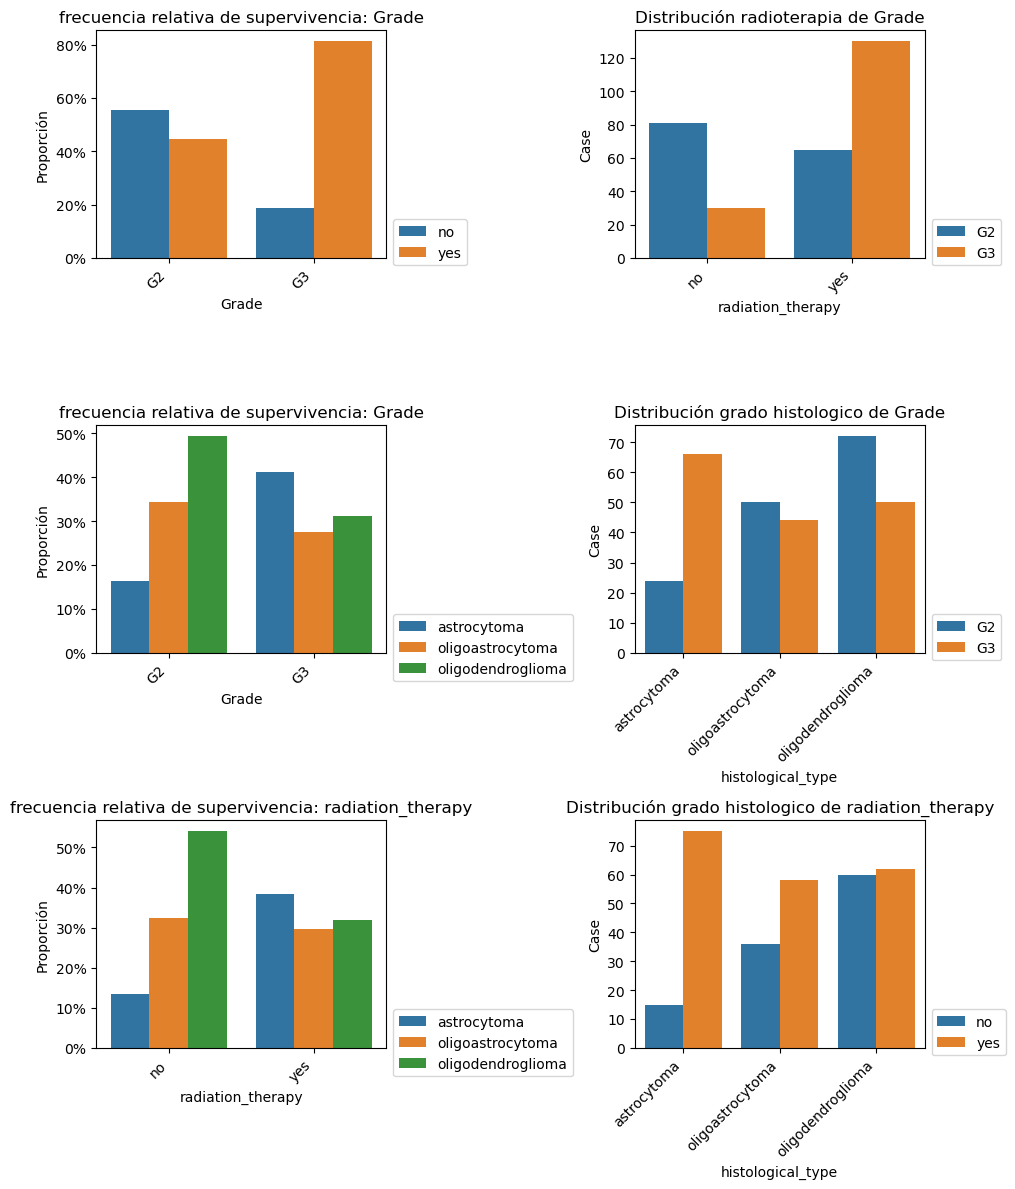

In [19]:
figure, axs = plt.subplots( 3,2, sharey=False, sharex=False, figsize=(10, 12))
graf_barras_x_rel(datos_clinico_moleculares, 'Grade', 'radiation_therapy', 'Case',  0,0)
graf_barras(datos_clinico_moleculares, 'Grade', 'radiation_therapy', 'Case',  0,1, 'radioterapia')



graf_barras_x_rel(datos_clinico_moleculares, 'Grade', 'histological_type', 'Case',  1,0)
graf_barras(datos_clinico_moleculares, 'Grade', 'histological_type', 'Case',  1,1, 'grado histologico')


graf_barras_x_rel(datos_clinico_moleculares, 'radiation_therapy', 'histological_type', 'Case',  2,0)
graf_barras(datos_clinico_moleculares, 'radiation_therapy', 'histological_type', 'Case',  2,1, 'grado histologico')
plt.tight_layout()
plt.show()

# Conclusion parte 1
Se observó una supervivencia del 100% de los pacientes con oligodendroglioma y una mortalidad del 100% en los pacientes con astrocytoma, oligoastrocytoma, adicionalmente se observo una mayor mortalidad relativa en los pacientes que recibieron radioterapia en comparacion a los que no la recibieron, esto se relaciona al hecho de que la mayoria de los pacientes que recibieron radioterapia corresponden a aquellos con un grado histologico mas avanzado, correspondiente al grado 3 

<Axes: >

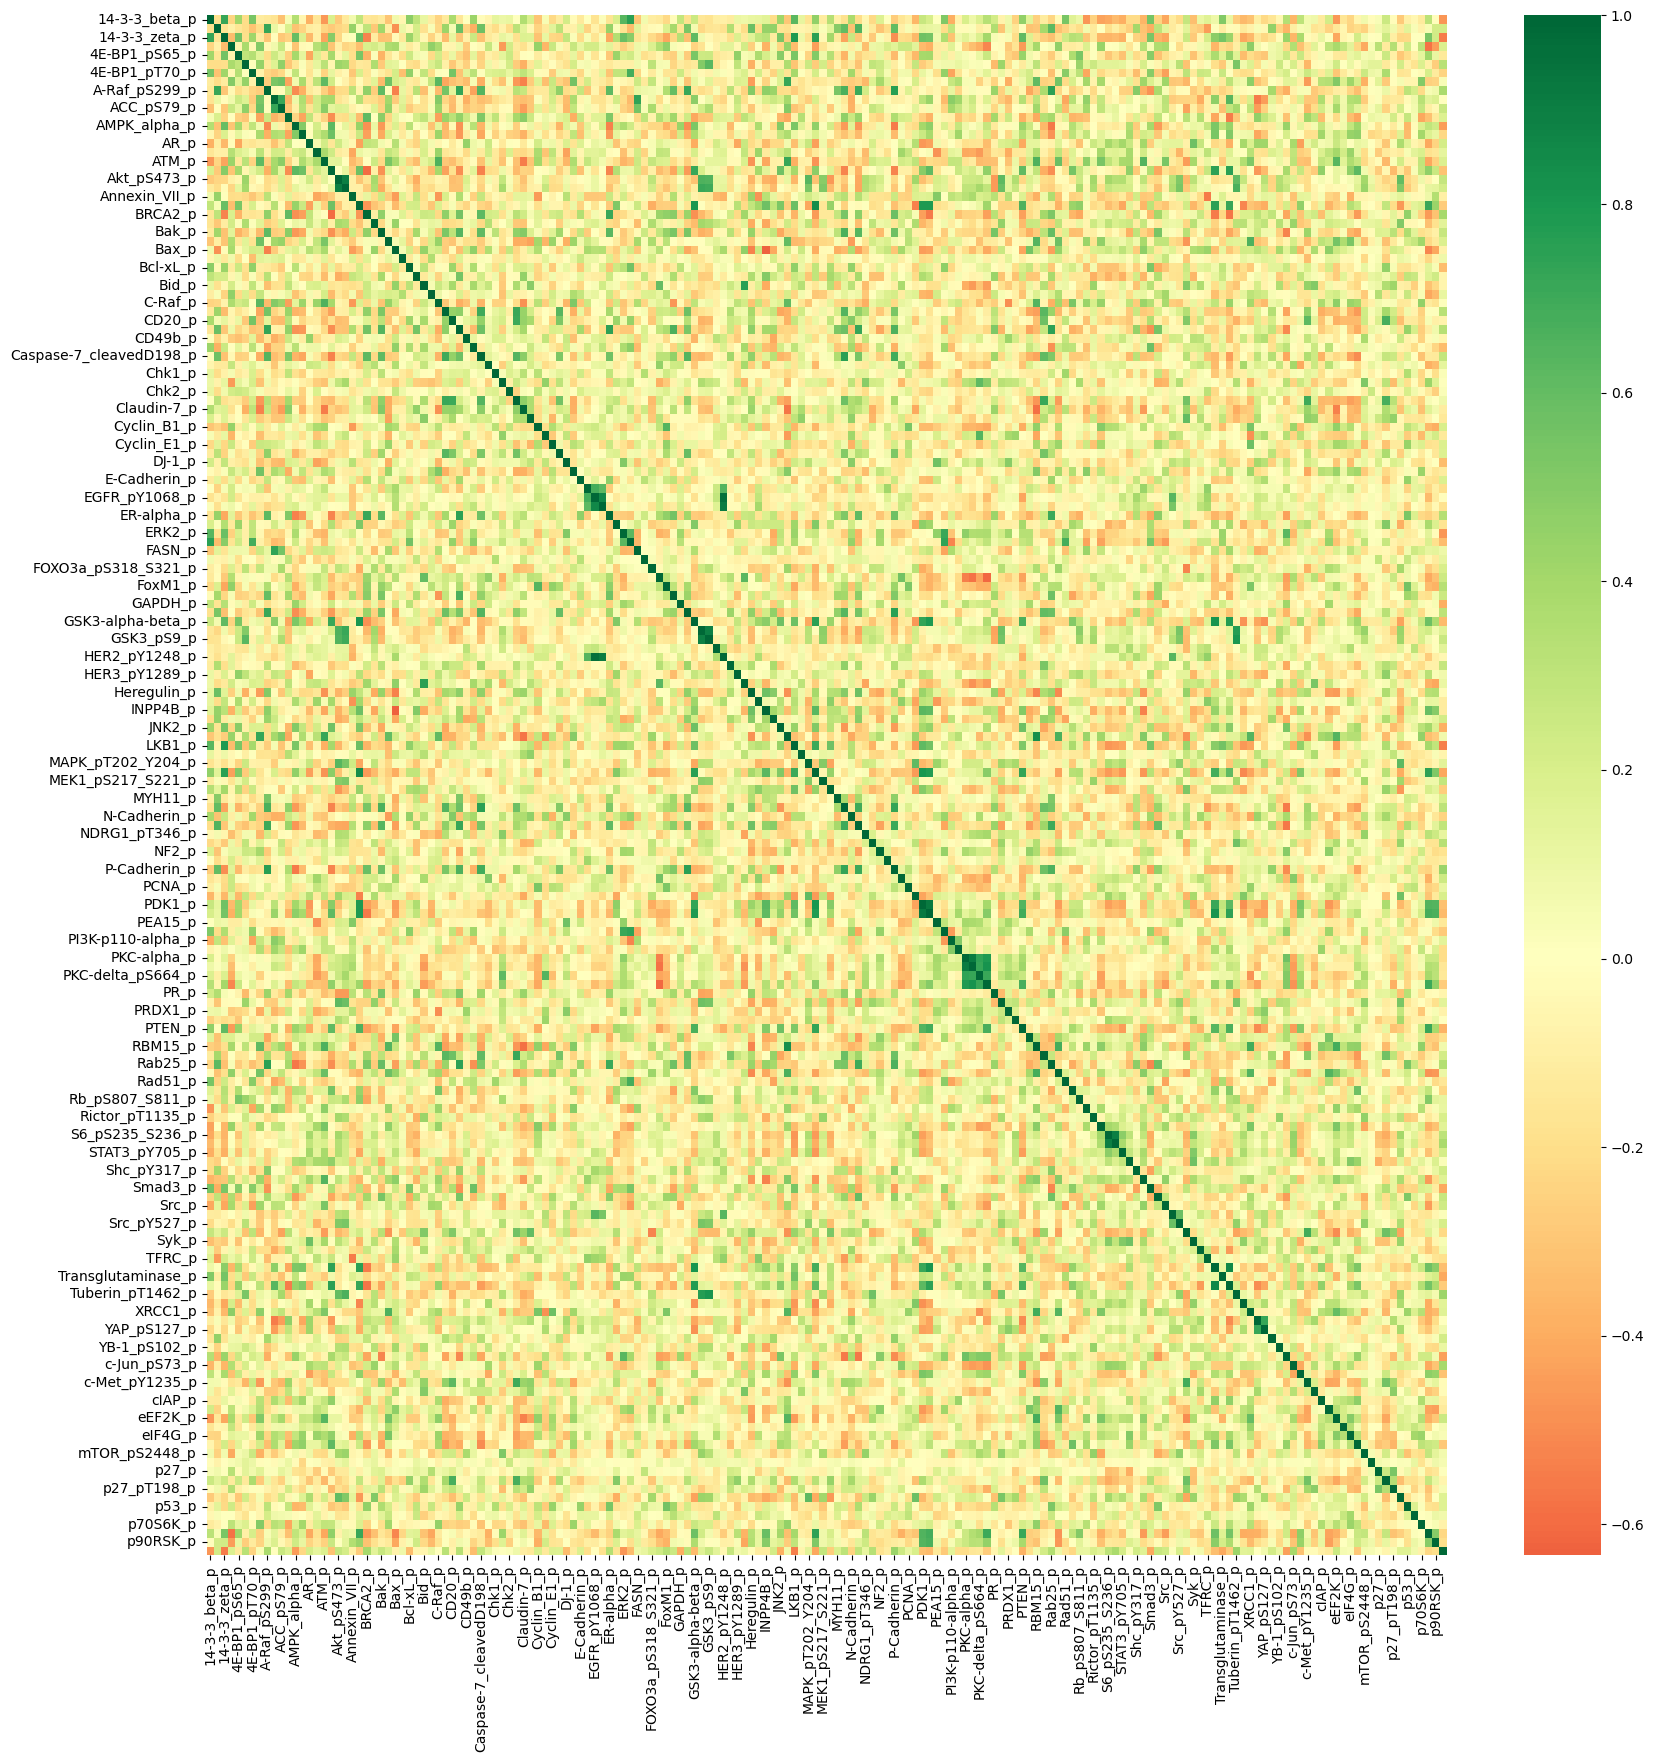

In [30]:
proteomica = data.loc[:, "14-3-3_beta_p":'p90RSK_pT359_S363_p']
corr_proteomica = proteomica.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_proteomica, cmap='RdYlGn', center=0)

<Axes: >

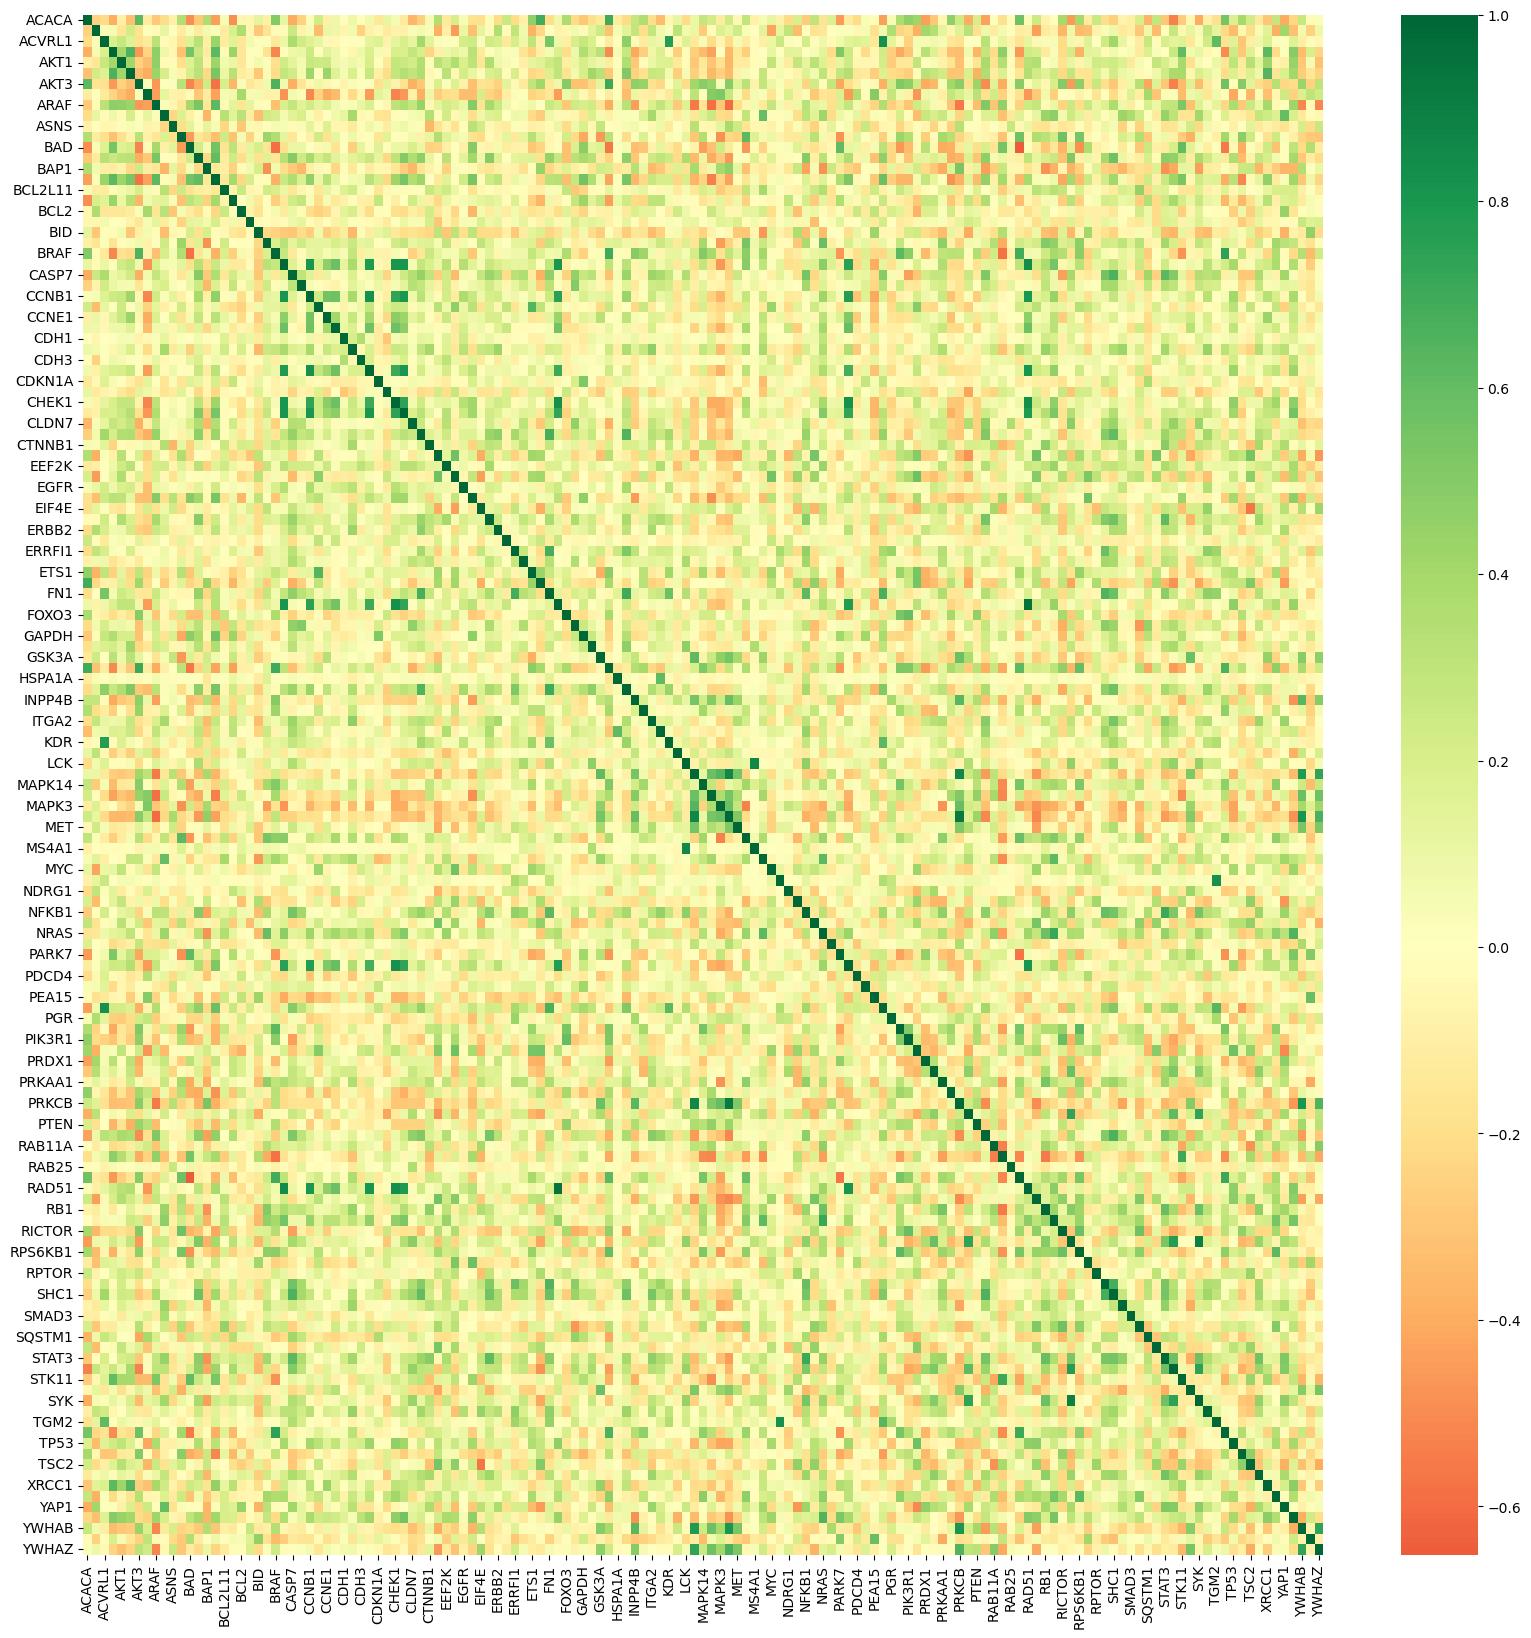

In [29]:
transcriptomica = data.loc[:, "ACACA":'YWHAZ']
corr_transcriptomica = transcriptomica.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_transcriptomica, cmap='RdYlGn', center=0)


In [24]:
datos_clinico_moleculares['radiation_therapy_N'] = datos_clinico_moleculares['radiation_therapy'].map({'no': 0, 'yes': 1})
datos_clinico_moleculares['Grade_N'] = datos_clinico_moleculares['Grade'].map({'G2': 0, 'G3': 1})

C:\Users\HP\AppData\Local\Temp\ipykernel_23048\3287782663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_clinico_moleculares['radiation_therapy_N'] = datos_clinico_moleculares['radiation_therapy'].map({'no': 0, 'yes': 1})
C:\Users\HP\AppData\Local\Temp\ipykernel_23048\3287782663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_clinico_moleculares['Grade_N'] = datos_clinico_moleculares['Grade'].map({'G2': 0, 'G3': 1})


In [25]:
datos_clinico_moleculares.columns

Index(['Case', 'years_to_birth', 'gender', 'histological_type', 'race',
       'ethnicity', 'radiation_therapy', 'Grade', 'Mutation.Count',
       'Percent.aneuploidy', 'IDH.status', 'outcome', 'radiation_therapy_N',
       'Grade_N'],
      dtype='object')

<Axes: >

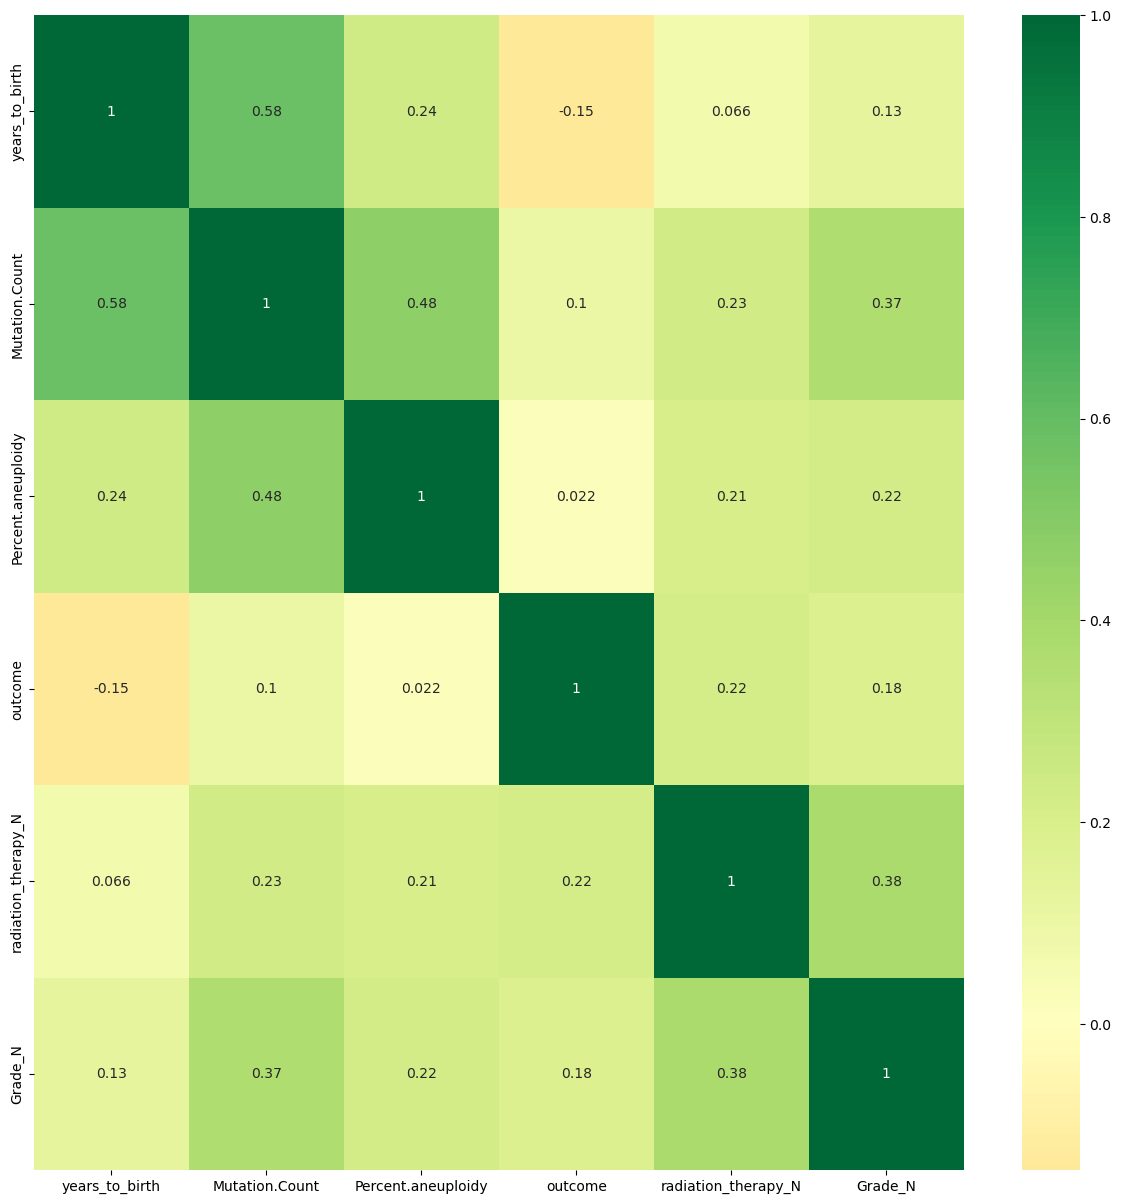

In [28]:
columnas = ['years_to_birth', 'Mutation.Count',
       'Percent.aneuploidy', 'outcome', 'radiation_therapy_N',
       'Grade_N']

corr_datos_clinico = datos_clinico_moleculares[columnas].corr()

plt.figure(figsize=(15,15))
sns.heatmap(corr_datos_clinico, cmap='RdYlGn', center=0, annot =True)